## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp
import sympy             as sm

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

## 데이터 불러오기

In [86]:
#몇차 데이터인지
testcase = "test1"

In [87]:
backward_list = ['3']
mm_list = ['1','2']
for i in range(100):
    temp_thick = pd.read_csv('./'+testcase+'/dp%d-blow-thick.csv'%(i+1),skiprows = 4)
    if testcase[-1] in backward_list:
        temp_thick.iloc[:,0] = temp_thick.iloc[-1,0]-temp_thick.iloc[:,0]
        temp_thick = temp_thick[::-1]
        
    if  testcase[-1] in mm_list:
        temp_thick.iloc[:,1] = temp_thick.iloc[:,1]*1000
        
    s = "dp%d_blow_thick = temp_thick"%(i+1); exec(s)

In [88]:
dp1_blow_thick

,Curve Length on Polyline 1 [ m ],THICKNESS [ m ]
0,0.000000,2.760244
1,0.003012,2.547540
2,0.006101,2.492307
3,0.007720,2.039532
4,0.009473,1.648354
...,...,...
56,0.283006,1.917187
57,0.286500,1.991407
58,0.290046,2.033052
59,0.293606,2.397834


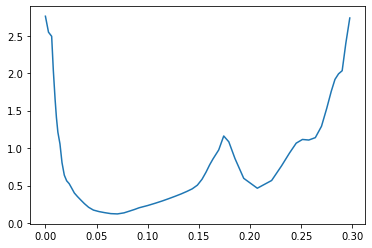

In [89]:
plt.plot(dp1_blow_thick.iloc[:,0],dp1_blow_thick.iloc[:,1])

### 전체 / GM-Gm

In [92]:
total_GMGm_factor = []
for i in range(100):
    exec("temp_thick = dp%d_blow_thick"%(i+1))
    val = np.max(temp_thick.iloc[:,1])-np.min(temp_thick.iloc[:,1])
    total_GMGm_factor = np.append(total_GMGm_factor,val)


### 전체 / slope

In [95]:
total_slope_factor = []
for i in range(100):
    exec("temp_thick = dp%d_blow_thick"%(i+1))
    slope_val = 0
    for j in range(temp_thick.shape[0]-1):
        slope = np.abs( (temp_thick.iloc[j+1,1]-temp_thick.iloc[j,1])/(temp_thick.iloc[j+1,0]-temp_thick.iloc[j,0]) )
        slope_val = slope_val+slope
    total_slope_factor = np.append(total_slope_factor,slope_val)

## sidewall slicing

In [101]:
type(int(testcase[-1]))

int

In [108]:
xy_factor_table = pd.read_csv('./factor table/test%d_xy_factor_table.csv'%(int(testcase[-1])), index_col = 0)
xy_factor_table

,case,L_pre,A_pre,V_pre,xyratio_pre,L_blow,A_blow,V_blow,xyratio_blow,y_blow/y_pre,L_blow/L_pre,A_blow/A_pre,V_blow/V_pre,bot_len,side_len,top_len
0,t1_dp1,0.104965,0.003375,0.00051,1.297975,0.297487,0.014325,0.002950,3.745982,2.955304,2.834158,4.244589,5.785178,0.063912,0.229694,0.003881
1,t1_dp2,0.104965,0.003375,0.00051,1.297975,0.297424,0.014320,0.002948,3.747782,2.956612,2.833556,4.243136,5.780028,0.063073,0.230426,0.003925
2,t1_dp3,0.104965,0.003375,0.00051,1.297975,0.298458,0.014331,0.002950,3.746032,2.952801,2.843409,4.246218,5.785469,0.065099,0.229499,0.003860
3,t1_dp4,0.104965,0.003375,0.00051,1.297975,0.297550,0.014326,0.002952,3.751084,2.956104,2.834763,4.244731,5.789519,0.063604,0.230037,0.003909
4,t1_dp5,0.104965,0.003375,0.00051,1.297975,0.297495,0.014327,0.002951,3.744040,2.955551,2.834237,4.245096,5.787312,0.063805,0.229800,0.003889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t1_dp96,0.104965,0.003375,0.00051,1.297975,0.297422,0.014332,0.002954,3.745282,2.956677,2.833539,4.246675,5.792656,0.061978,0.231620,0.003824
96,t1_dp97,0.104965,0.003375,0.00051,1.297975,0.297373,0.014327,0.002951,3.744417,2.956935,2.833074,4.245152,5.786224,0.063223,0.230315,0.003835
97,t1_dp98,0.104965,0.003375,0.00051,1.297975,0.297406,0.014326,0.002950,3.744634,2.956196,2.833393,4.244857,5.785734,0.064970,0.228606,0.003830
98,t1_dp99,0.104965,0.003375,0.00051,1.297975,0.297379,0.014320,0.002948,3.745420,2.954344,2.833136,4.243090,5.780920,0.062249,0.231299,0.003831


In [113]:
top_len = xy_factor_table['top_len']
bot_len = xy_factor_table['bot_len']

In [144]:
for i in range(100):
    exec("temp_thick = dp%d_blow_thick"%(i+1))
    
    top_cut = np.where(temp_thick.iloc[:,0] > top_len[i])
    top_cut_index = top_cut[0][0]
    
    bot_cut = np.where(temp_thick.iloc[:,0] >temp_thick.iloc[-1,0]-bot_len[i])
    bot_cut_index = bot_cut[0][0]
    
    temp_side_thick = temp_thick.iloc[top_cut_index:bot_cut_index,:]
    exec("dp%d_blow_side_thick = temp_side_thick"%(i+1))

### sidewall / GM-Gm

In [149]:
side_GMGm_factor = []
for i in range(100):
    exec("temp_thick = dp%d_blow_side_thick"%(i+1))
    val = np.max(temp_thick.iloc[:,1])-np.min(temp_thick.iloc[:,1])
    side_GMGm_factor = np.append(side_GMGm_factor,val)


### sidewall / slope

In [150]:
side_slope_factor = []
for i in range(100):
    exec("temp_thick = dp%d_blow_side_thick"%(i+1))
    slope_val = 0
    for j in range(temp_thick.shape[0]-1):
        slope = np.abs( (temp_thick.iloc[j+1,1]-temp_thick.iloc[j,1])/(temp_thick.iloc[j+1,0]-temp_thick.iloc[j,0]) )
        slope_val = slope_val+slope
    side_slope_factor = np.append(side_slope_factor,slope_val)

# 내일 peak 개수 / PM-Gm 만들고 인자 만들기